In [1]:
from challenging_kelvin import calculate_wake, phi_in, phi_in2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'jet'

In [3]:
d, l = 0.0625, 0.002

In [5]:
phis = []
xs = []
Rs = [1, 1.25, 1.5, 1.75, 2, 4, 8, 16, 32, 64, 128]
ds = [d/2, d/2, d/2, d/2, d/2, d/2, d/2, d/2, d, d, d]
for ii, r in enumerate(Rs):
    x, p= calculate_wake(l, r, ds[ii], 1)
    xs.append(x)
    phis.append(p)
    #phis.append(calculate_wake(l, r, d, 0))

l=0.002000_kmax=1.000000_step=0.031250
(0, 1, 3.3748968992163529e-22, 8.9751458351747536e-05, 0.0089751458351747544)


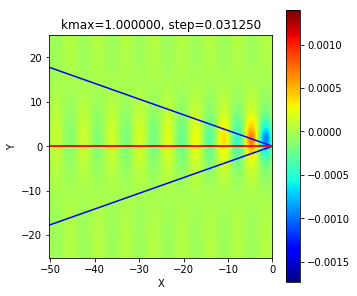

l=0.002000_kmax=1.250000_step=0.031250
(1, 1.25, 7.0303734622106925e-22, 0.00026470672449679418, 0.026470672449679419)


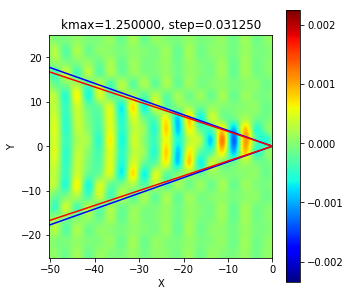

l=0.002000_kmax=1.500000_step=0.031250
(2, 1.5, -5.2939559203393771e-23, 0.0002393738877147724, 0.02393738877147724)


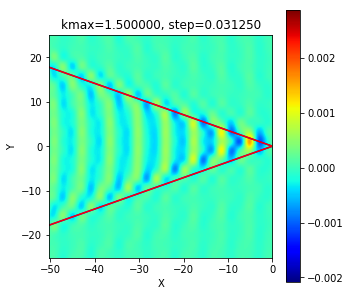

l=0.002000_kmax=1.750000_step=0.031250
(3, 1.75, 8.3406815724530598e-22, 0.00018897419600193751, 0.018897419600193751)


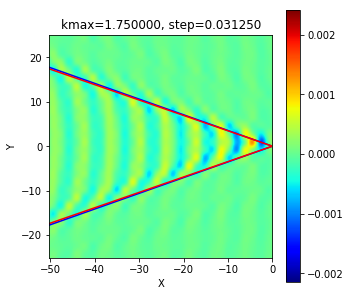

l=0.002000_kmax=2.000000_step=0.031250
(4, 2, 1.2407709188295415e-22, 0.00016325043521481103, 0.016325043521481102)


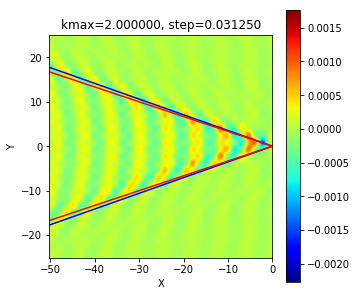

l=0.002000_kmax=4.000000_step=0.031250
(5, 4, 2.5022213529729087e-23, 6.9973879361245607e-05, 0.00027989551744498243)


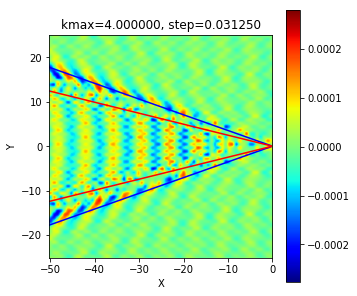

l=0.002000_kmax=8.000000_step=0.031250
(6, 8, -7.3606149820148322e-24, 3.0470394629085985e-05, 7.6175986572714956e-05)


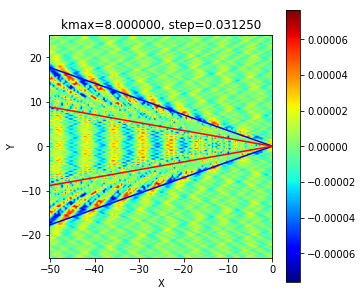

l=0.002000_kmax=16.000000_step=0.031250
(7, 16, -2.3506792798137798e-25, 1.4279615697844606e-05, 2.1419423546766909e-05)


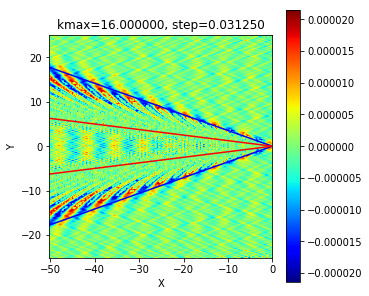

l=0.002000_kmax=32.000000_step=0.062500
(8, 32, 1.4881173090285035e-23, 5.8323415501183356e-05, 5.8323415501183356e-05)


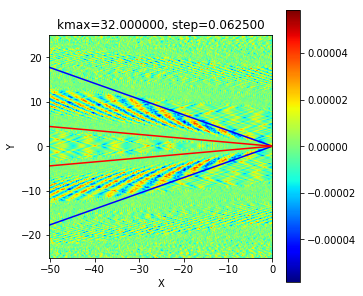

l=0.002000_kmax=64.000000_step=0.062500
(9, 64, 1.8651953460790438e-24, 2.7984171329308713e-05, 2.7984171329308713e-05)


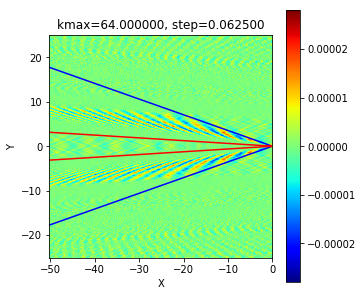

l=0.002000_kmax=128.000000_step=0.062500
(10, 128, -1.040034217443382e-25, 1.3668555229380935e-05, 1.3668555229380935e-05)


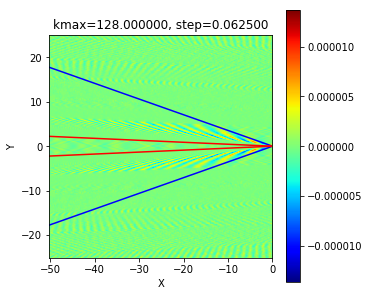

In [6]:
bounds = [100, 100, 100, 100, 100, 4, 2.5, 1.5, 1, 1, 1]
rpl = xs[-1][-1]
for ind in range(0, len(phis)):
    phi = phis[ind]
    x = xs[ind]
    r = x[-1]
    stdev = np.std(np.real(phi))
    toshow = np.real(phi) * (np.abs(np.real(phi)) < (bounds[ind] * stdev))
    fig = plt.figure(figsize=(5.0, 5.0))
    plt.imshow(toshow, extent=[-r, r, -r, r], interpolation='gaussian')
    plt.plot(x, np.sqrt(x**2.0 / 8.), color='blue')
    plt.plot(x, -np.sqrt(x**2.0 / 8.), color='blue')
    angle = np.arctan(np.sqrt(Rs[ind] - 1.) / (2. * Rs[ind] - 1.))
    slope = np.tan(angle)
    plt.plot(x, slope * x, color='red')
    plt.plot(x, -slope * x, color='red')
    plt.xlim([-rpl, 0])
    plt.xlabel('X')
    plt.ylim([-rpl/2, rpl/2])
    plt.ylabel('Y')
    plt.title('kmax=%f, step=%f' % (Rs[ind], ds[ind]))
    plt.colorbar()
    filename='l=%f_kmax=%f_step=%f' % (l, Rs[ind], ds[ind])
    print(filename)
    print(ind, Rs[ind], np.mean(np.real(phi)), np.std(np.real(phi)), bounds[ind] * stdev)
    #fig.savefig('/home/jcolen/Documents/kelvinmach/challenging_kelvin/%s.png' % filename)
    #fig.savefig('C:\Users\Jonathan\Documents\School\Kolomeisky\challenging_kelvin\%s.png' % filename)
    plt.show()

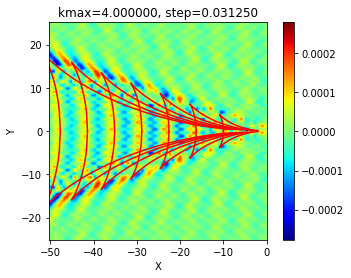

In [8]:
ind = 5
phii = phis[ind]
xi = xs[ind]
ri = xi[-1]
stdevi = np.std(np.real(phii))
toshowi = np.real(phii) * (np.abs(np.real(phii)) < (bounds[ind] * stdevi))
fig = plt.figure()
plt.imshow(toshowi, extent=[-ri, ri, -ri, ri], interpolation='gaussian')
plt.xlim([-rpl, 0])
plt.ylim([-rpl/2, rpl/2])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('kmax=%f, step=%f' % (Rs[ind], ds[ind]))

t = np.linspace(1, 100, 10000)
phase = 10/np.pi - 3.0
for n in range(1, 8):
    t32 = np.power(t, 1.5)
    xt = -np.pi * (2*n + 1 + phase) * (2*t - 1) / t32
    ytp = np.pi * (2*n + 1 + phase) * np.sqrt(t - 1) / t32
    ytn = -np.pi * (2*n + 1 + phase) * np.sqrt(t - 1) / t32
    plt.plot(xt, ytp, color='red')
    plt.plot(xt, ytn, color='red')

plt.colorbar()
plt.show()



((63.98937991371168+79.082645589964528j), (-59.311605165986549-36.541161155387165j))


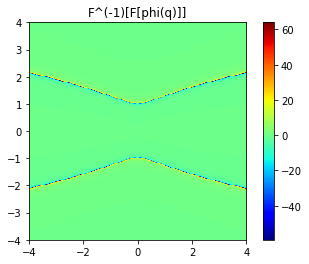

((255.95751965475517+316.33058236028324j), (-237.24642066385604-146.16464462137043j))


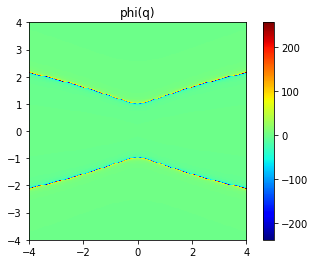

In [10]:
#Reverse fourier transform
ind = 5 #kmax = 4
phii = phis[ind]
xi = xs[ind]
n = len(xi)
m = (n-1) / 2
dx = xi[-1] - xi[-2]
ks = np.pi / (dx * m) * np.arange(-m, m+2, 1)
n += 1
phi_grid = np.roll(phii, -m, axis=0)
phi_grid = np.roll(phi_grid, -m, axis=1)
fPhi = np.fft.fft2(phi_grid / (d * d))
fPhi = np.roll(fPhi, m, axis=1)
fPhi = np.roll(fPhi, m, axis=0)
fPhi = np.transpose(fPhi)

plt.figure()
ri = ks[-1]
print(np.max(fPhi), np.min(fPhi))
plt.title('F^(-1)[F[phi(q)]]')
plt.imshow(np.real(fPhi), extent=[-ri, ri, -ri, ri])
plt.colorbar()
plt.show()

plt.figure()
phi2 = phi_in2(ks[:, None], ks[None, :], l)
plt.title('phi(q)')
print(np.max(phi2), np.min(phi2))
plt.imshow(np.real(phi2), extent=[-ri, ri, -ri, ri])
plt.colorbar()
plt.show()

(2096127, 4194303)
(2096127, 4194303)


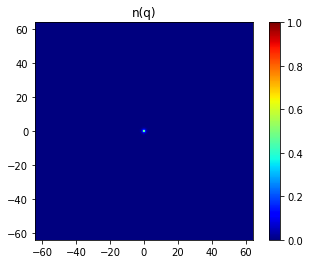

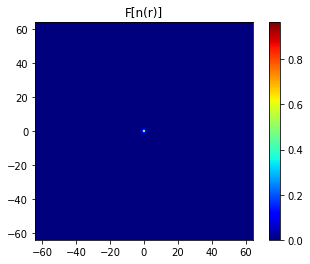

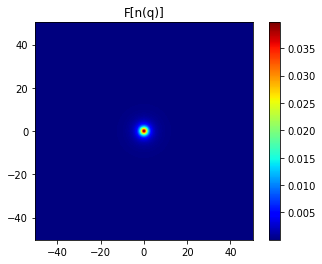

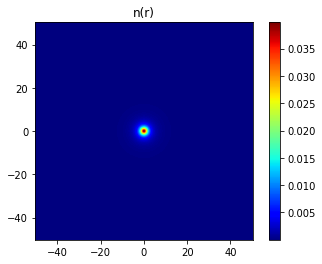

In [11]:
def nextr(r, a=2.0):
    return a / (2 * np.pi * np.power(r**2.0 + a**2.0, 1.5))

def nextq(q, a=2.0):
    return np.exp(-q * a)

def phiin(kx, ky, l, func=nextr):
    k = np.sqrt(kx*kx + ky*ky)
    return func(k)

ind = -2
R = Rs[ind]
k = np.arange(-R+d, R+d, d)
n = len(k)
m = (n - 1) / 2
x = np.pi / (d * m) * np.arange(-m, m+2, 1)
phi_q = phiin(k[:,None], k[None,:], l, func=nextq)
phi_r = phiin(x[:,None], x[None,:], l, func=nextr)

dx = x[-1] - x[-2]
dk = k[-1] - k[-2]

print(np.argmax(phi_q), np.argmin(phi_q))
print(np.argmax(phi_r), np.argmin(phi_r))

phi_qgrid = np.roll(phi_q, -m, axis=0)
phi_qgrid = np.roll(phi_qgrid, -m, axis=1)
fPhiq = np.fft.ifft2(phi_qgrid) / (dx * dx)
fPhiq = np.roll(fPhiq, m, axis=1)
fPhiq = np.roll(fPhiq, m, axis=0)
fPhiq = np.transpose(fPhiq)

phi_rgrid = np.roll(phi_r, -m, axis=0)
phi_rgrid = np.roll(phi_rgrid, -m, axis=1)
fPhir = np.fft.fft2(phi_rgrid) * dx * dx
fPhir = np.roll(fPhir, m, axis=1)
fPhir = np.roll(fPhir, m, axis=0)
fPhir = np.transpose(fPhir)

x0 = x[-1]
k0 = k[-1]
plt.figure()
plt.title('n(q)')
plt.imshow(np.real(phi_q), extent=[-k0, k0, -k0, k0])
plt.colorbar()
plt.figure()
plt.title('F[n(r)]')
plt.imshow(np.real(fPhir), extent=[-k0, k0, -k0, k0])
plt.colorbar()
plt.figure()
plt.title('F[n(q)]')
plt.imshow(np.real(fPhiq), extent=[-x0, x0, -x0, x0])
plt.colorbar()
plt.figure()
plt.title('n(r)')
plt.imshow(np.real(phi_r), extent=[-x0, x0, -x0, x0])
plt.colorbar()

plt.show()